In [1]:
import warnings

import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

# hide warnings
warnings.filterwarnings("ignore")

In [2]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_error

In [3]:
dataset = pd.read_csv('train.csv',index_col=[0], usecols = [0,2])
y = dataset[:364]
y.index = pd.RangeIndex(start=0, stop=364, step=1)
plot_series(y)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# X_train = X[0:326]
# X_test = X[325:357]
# Y_train = Y[0:326]
# Y_test = Y[325:357]
# plt.figure(figsize=(10, 10))
# plt.xticks(rotation=45)
# plt.plot( X_train,Y_train)
# plt.plot( X_test,Y_test)

In [1]:
# step 1: splitting historical data
y_train, y_test = temporal_train_test_split(y, test_size=30)
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

NameError: name 'temporal_train_test_split' is not defined

## NaiveForecaster

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

0.15659811104719748
5.6240920101851835


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

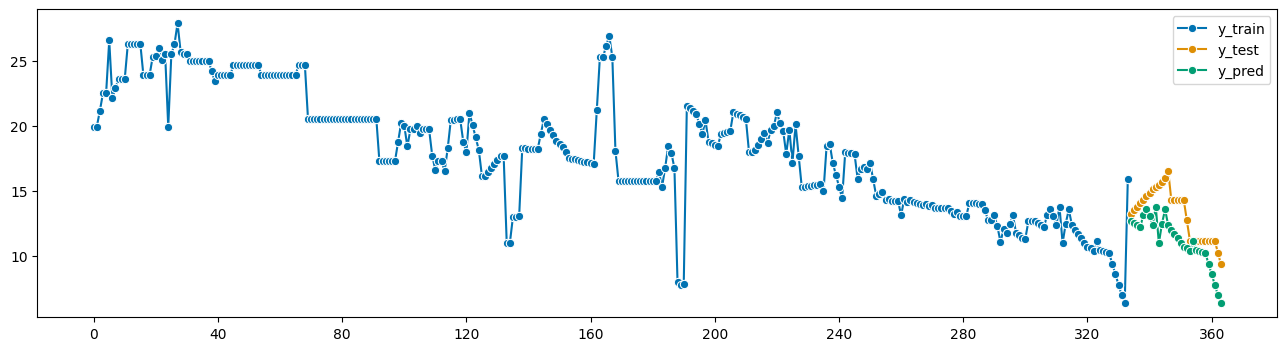

In [ ]:
# step 2: running the basic forecasting workflow

forecaster = NaiveForecaster(strategy="last", sp=31)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

## AutoETS

In [ ]:
from sktime.forecasting.ets import AutoETS

/home/andrey/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.21146631492837203
9.323799745554771


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

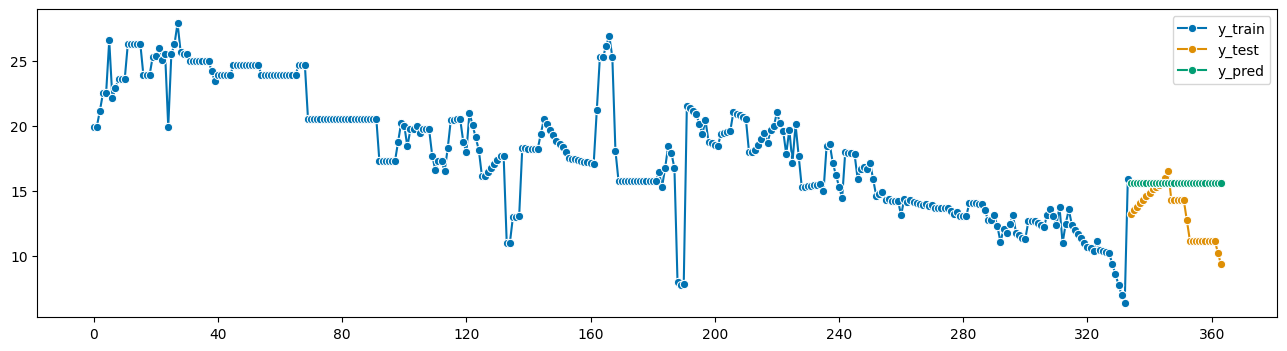

In [ ]:
# step 2: running the basic forecasting workflow
forecaster = AutoETS(auto=True, sp=31, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

## Exponential smoothing

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

0.16746402123403878
6.326674503524655


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

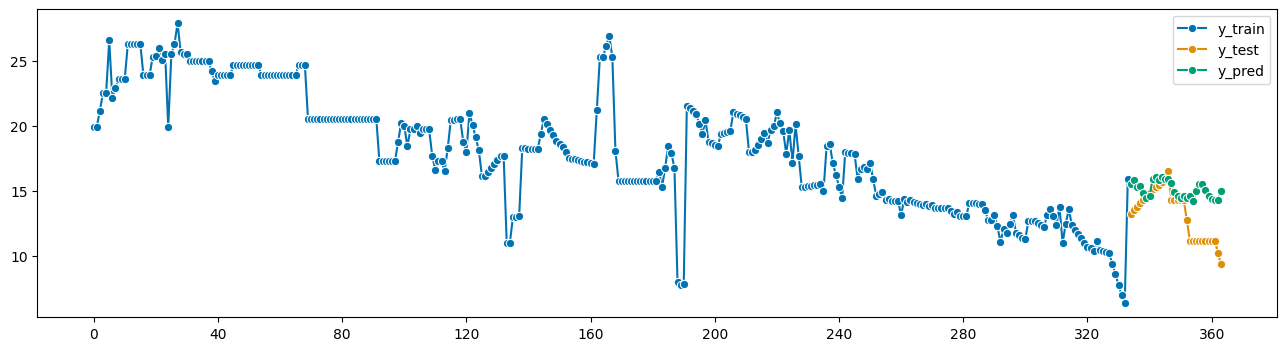

In [ ]:
# step 2: running the basic forecasting workflow
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=30)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development


## ARIMA and autoARIMA

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

0.14013561938743402
5.917098830593994


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

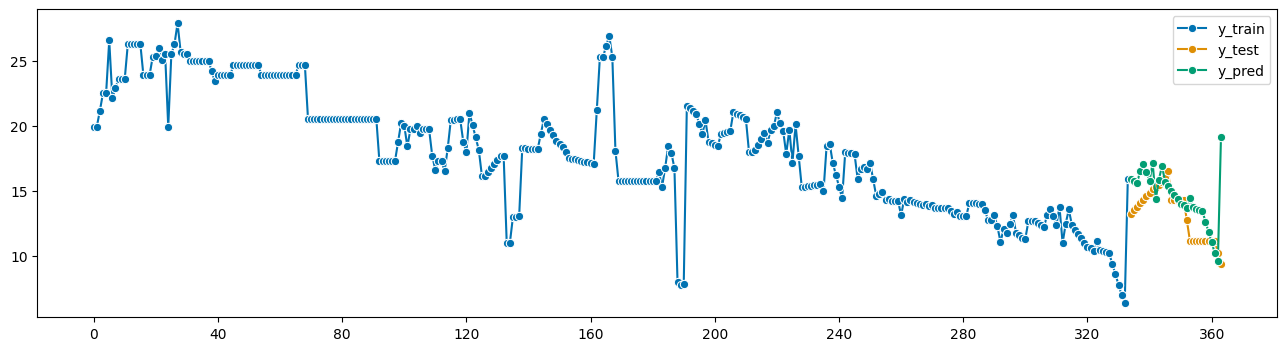

In [ ]:
# step 2: running the basic forecasting workflow
forecaster = ARIMA(
    order=(1, 1, 0), seasonal_order=(0, 1, 0, 30), suppress_warnings=True
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

0.23427729534730907
11.028548245000005


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

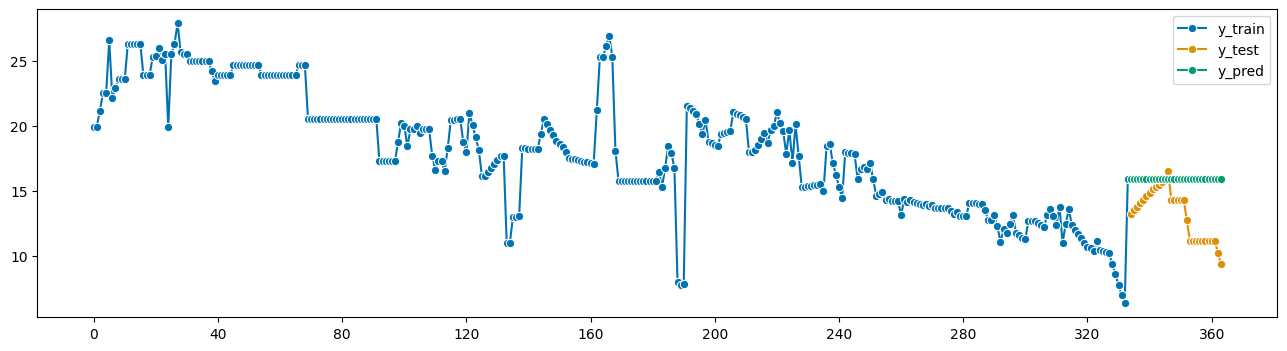

In [ ]:
# step 2: running the basic forecasting workflow
forecaster = AutoARIMA(sp=30, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

## BATS and TBATS

In [ ]:
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS

0.12806588164905258
3.6372607513180237


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

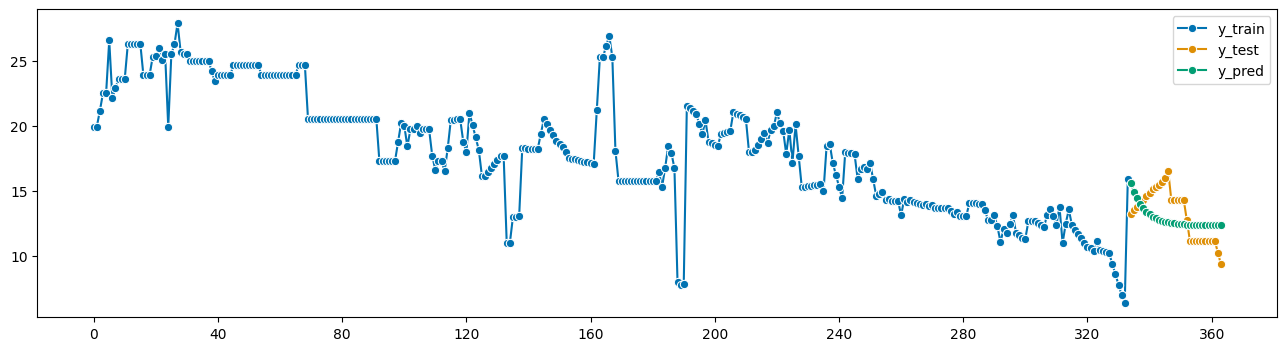

In [ ]:
# step 2: running the basic forecasting workflow
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = BATS(sp=30, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

0.12806588164905258
3.6372607513180237


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

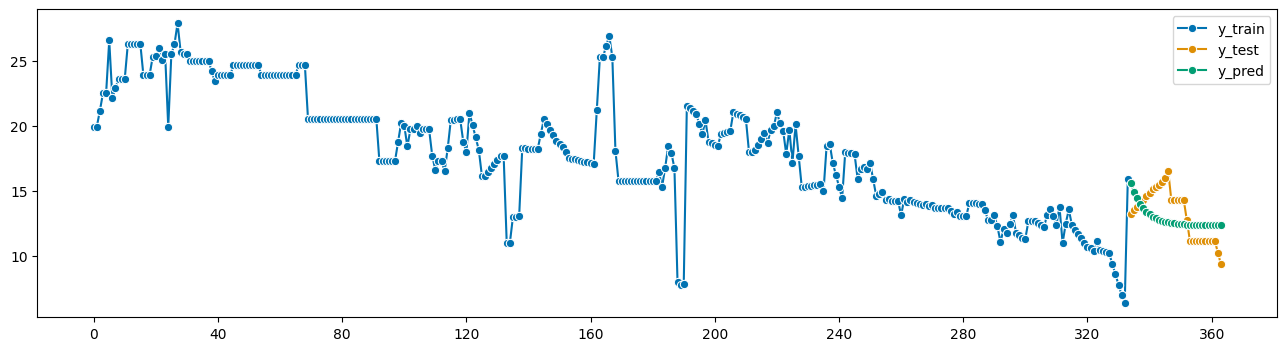

In [ ]:
# step 2: running the basic forecasting workflow
forecaster = TBATS(sp=30, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric
mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
RMSE = mean_squared_error(y_test, y_pred)
print(mape)
print(RMSE)
# step 4: computing the forecast performance
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# step 5: testing forecast performance against baseline
# under development

## Prophet